In this Jupyter notebook I am going to tackle a Regression problem by increasing the complexity of both preprocessing and modeling.

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
diamond_data = pd.read_csv('./diamonds.csv',sep=',', decimal='.')
print diamond_data.shape
diamond_data.head(6)

(53940, 11)


Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48

Eliminating 'Unnamed: 0' column for obvious purposes:

In [4]:
diamond_data = diamond_data[['price','carat','cut','color','clarity','depth','table','x','y','z']]
diamond_data.head(8)

price  carat        cut color clarity  depth  table     x     y     z
0    326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1    326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2    327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3    334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4    335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
5    336   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48
6    336   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47
7    337   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53

We have categorical variables. I will address them after some analysis.

In [5]:
diamond_data.describe()

price         carat         depth         table             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean    3932.799722      0.797940     61.749405     57.457184      5.731157   
std     3989.439738      0.474011      1.432621      2.234491      1.121761   
min      326.000000      0.200000     43.000000     43.000000      0.000000   
25%      950.000000      0.400000     61.000000     56.000000      4.710000   
50%     2401.000000      0.700000     61.800000     57.000000      5.700000   
75%     5324.250000      1.040000     62.500000     59.000000      6.540000   
max    18823.000000      5.010000     79.000000     95.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

There are diamonds with no length, width or depth! This might be a data measurement error but let´s analyze this to ensure the hypothesis. 

In [6]:
print 'number of diamonds with no length = {:.1f} '.format(diamond_data['x'].value_counts()[0])
print 'number of diamonds with no width = {:.1f} '.format(diamond_data['y'].value_counts()[0])
print 'number of diamonds with no depth = {:.1f} '.format(diamond_data['z'].value_counts()[0])

number of diamonds with no length = 8.0 
number of diamonds with no width = 7.0 
number of diamonds with no depth = 20.0 


Interesting, now let's see how the rows of this values look like

In [7]:
diamond_data.loc[diamond_data['x']==0]

price  carat        cut color clarity  depth  table    x     y    z
11182   4954   1.07      Ideal     F     SI2   61.6   56.0  0.0  6.62  0.0
11963   5139   1.00  Very Good     H     VS2   63.3   53.0  0.0  0.00  0.0
15951   6381   1.14       Fair     G     VS1   57.5   67.0  0.0  0.00  0.0
24520  12800   1.56      Ideal     G     VS2   62.2   54.0  0.0  0.00  0.0
26243  15686   1.20    Premium     D    VVS1   62.1   59.0  0.0  0.00  0.0
27429  18034   2.25    Premium     H     SI2   62.8   59.0  0.0  0.00  0.0
49556   2130   0.71       Good     F     SI2   64.1   60.0  0.0  0.00  0.0
49557   2130   0.71       Good     F     SI2   64.1   60.0  0.0  0.00  0.0

In [8]:
diamond_data.loc[diamond_data['y']==0]

price  carat        cut color clarity  depth  table    x    y    z
11963   5139   1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0
15951   6381   1.14       Fair     G     VS1   57.5   67.0  0.0  0.0  0.0
24520  12800   1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0
26243  15686   1.20    Premium     D    VVS1   62.1   59.0  0.0  0.0  0.0
27429  18034   2.25    Premium     H     SI2   62.8   59.0  0.0  0.0  0.0
49556   2130   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0
49557   2130   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0

In [9]:
diamond_data.loc[diamond_data['z']==0]

price  carat        cut color clarity  depth  table     x     y    z
2207    3142   1.00    Premium     G     SI2   59.1   59.0  6.55  6.48  0.0
2314    3167   1.01    Premium     H      I1   58.1   59.0  6.66  6.60  0.0
4791    3696   1.10    Premium     G     SI2   63.0   59.0  6.50  6.47  0.0
5471    3837   1.01    Premium     F     SI2   59.2   58.0  6.50  6.47  0.0
10167   4731   1.50       Good     G      I1   64.0   61.0  7.15  7.04  0.0
11182   4954   1.07      Ideal     F     SI2   61.6   56.0  0.00  6.62  0.0
11963   5139   1.00  Very Good     H     VS2   63.3   53.0  0.00  0.00  0.0
13601   5564   1.15      Ideal     G     VS2   59.2   56.0  6.88  6.83  0.0
15951   6381   1.14       Fair     G     VS1   57.5   67.0  0.00  0.00  0.0
24394  12631   2.18    Premium     H     SI2   59.4   61.0  8.49  8.45  0.0
24520  12800   1.56      Ideal     G     VS2   62.2   54.0  0.00  0.00  0.0
26123  15397   2.25    Premium     I     SI1   61.3   58.0  8.52  8.42  0.0
26243  15686   1.20    Premium     D    VVS1   62.1   59.0  0.00  0.00  0.0
27112  17265   2.20    Premium     H     SI1   61.2   59.0  8.42  8.37  0.0
27429  18034   2.25    Premium     H     SI2   62.8   59.0  0.00  0.00  0.0
27503  18207   2.02    Premium     H     VS2   62.7   53.0  8.02  7.95  0.0
27739  18788   2.80       Good     G     SI2   63.8   58.0  8.90  8.85  0.0
49556   2130   0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.0
49557   2130   0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.0
51506   2383   1.12    Premium     G      I1   60.4   59.0  6.71  6.67  0.0

Given Diamonds cannot be that thick, we confirm that these are measurement mistakes. Will have to take that into account when modeling. But first lets see what the correlations of the variables are.

In [10]:
diamond_data.corr()

price     carat     depth     table         x         y         z
price  1.000000  0.921591 -0.010647  0.127134  0.884435  0.865421  0.861249
carat  0.921591  1.000000  0.028224  0.181618  0.975094  0.951722  0.953387
depth -0.010647  0.028224  1.000000 -0.295779 -0.025289 -0.029341  0.094924
table  0.127134  0.181618 -0.295779  1.000000  0.195344  0.183760  0.150929
x      0.884435  0.975094 -0.025289  0.195344  1.000000  0.974701  0.970772
y      0.865421  0.951722 -0.029341  0.183760  0.974701  1.000000  0.952006
z      0.861249  0.953387  0.094924  0.150929  0.970772  0.952006  1.000000

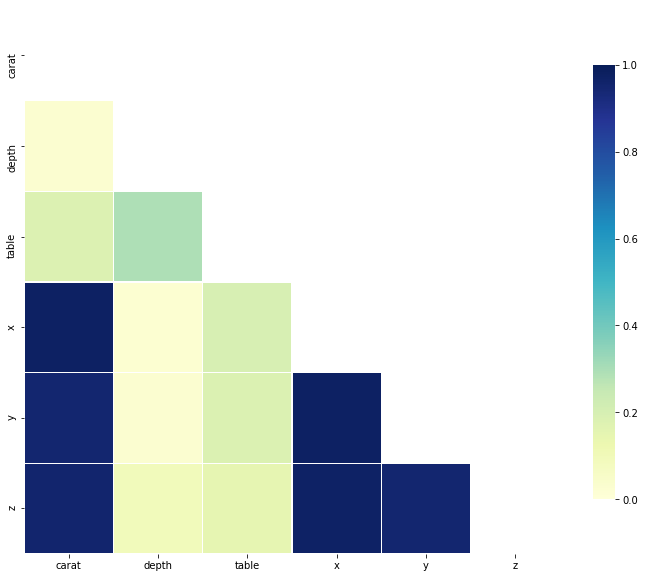

In [11]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(diamond_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

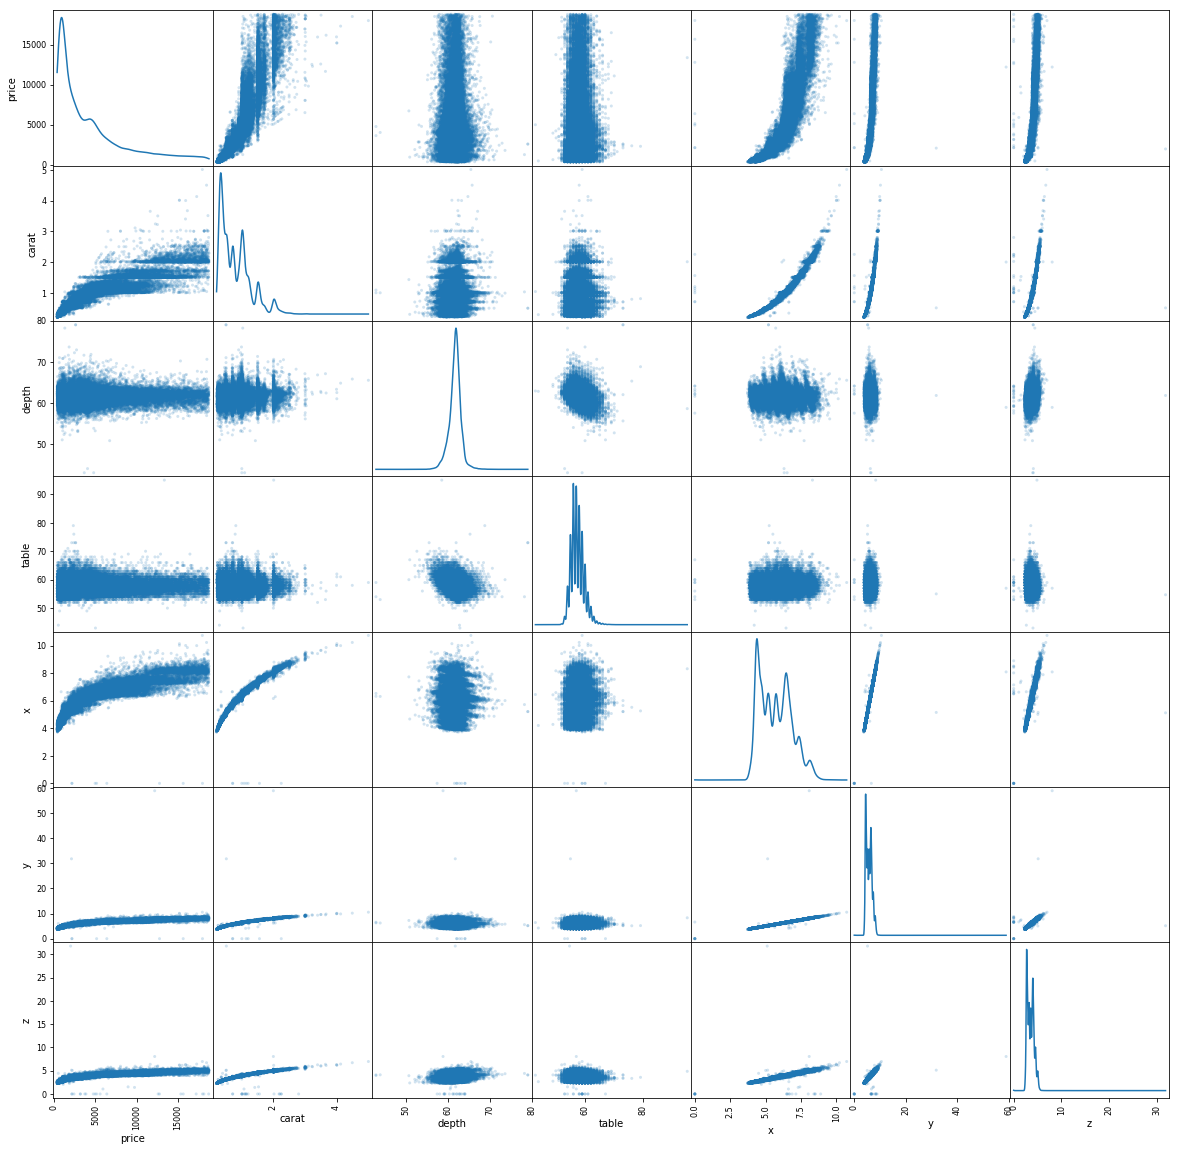

In [12]:
pd.plotting.scatter_matrix(diamond_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Seen the high correlation between length, width, depth and weight I am going to make two data tables: one with all the data and other without length, width and depth in order to compare the modeling results.

In [13]:
diamond_data_f = diamond_data.drop(['x','y','z'], axis=1)
diamond_data_f.head()

price  carat      cut color clarity  depth  table
0    326   0.23    Ideal     E     SI2   61.5   55.0
1    326   0.21  Premium     E     SI1   59.8   61.0
2    327   0.23     Good     E     VS1   56.9   65.0
3    334   0.29  Premium     I     VS2   62.4   58.0
4    335   0.31     Good     J     SI2   63.3   58.0

Now it's time to transform the categorical variables into dummies:

In [14]:
diamond_data01 = pd.get_dummies(diamond_data)
print diamond_data01.shape
diamond_data01.head(1)

(53940, 27)


price  carat  depth  table     x     y     z  cut_Fair  cut_Good  \
0    326   0.23   61.5   55.0  3.95  3.98  2.43         0         0   

   cut_Ideal      ...       color_I  color_J  clarity_I1  clarity_IF  \
0          1      ...             0        0           0           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0            0            1            0            0             0   

   clarity_VVS2  
0             0  

[1 rows x 27 columns]

In [15]:
diamond_data02 = pd.get_dummies(diamond_data_f)
print diamond_data02.shape
diamond_data02.head(1)

(53940, 24)


price  carat  depth  table  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
0    326   0.23   61.5   55.0         0         0          1            0   

   cut_Very Good  color_D      ...       color_I  color_J  clarity_I1  \
0              0        0      ...             0        0           0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0           0            0            1            0            0   

   clarity_VVS1  clarity_VVS2  
0             0             0  

[1 rows x 24 columns]

Now lets remove the rows that contain mistaken length, width and depth values in diamond_data01

In [16]:
diamond_data01 = diamond_data01[diamond_data01.x != 0]
diamond_data01.loc[diamond_data['x']==0]

Empty DataFrame
Columns: [price, carat, depth, table, x, y, z, cut_Fair, cut_Good, cut_Ideal, cut_Premium, cut_Very Good, color_D, color_E, color_F, color_G, color_H, color_I, color_J, clarity_I1, clarity_IF, clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS2]
Index: []

[0 rows x 27 columns]

In [17]:
diamond_data01 = diamond_data01[diamond_data01.y != 0]
diamond_data01.loc[diamond_data['x']==0]

Empty DataFrame
Columns: [price, carat, depth, table, x, y, z, cut_Fair, cut_Good, cut_Ideal, cut_Premium, cut_Very Good, color_D, color_E, color_F, color_G, color_H, color_I, color_J, clarity_I1, clarity_IF, clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS2]
Index: []

[0 rows x 27 columns]

In [18]:
diamond_data01 = diamond_data01[diamond_data01.z != 0]
diamond_data01.loc[diamond_data['x']==0]

Empty DataFrame
Columns: [price, carat, depth, table, x, y, z, cut_Fair, cut_Good, cut_Ideal, cut_Premium, cut_Very Good, color_D, color_E, color_F, color_G, color_H, color_I, color_J, clarity_I1, clarity_IF, clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS2]
Index: []

[0 rows x 27 columns]

In [19]:
print diamond_data01.shape
diamond_data01.head(1)

(53920, 27)


price  carat  depth  table     x     y     z  cut_Fair  cut_Good  \
0    326   0.23   61.5   55.0  3.95  3.98  2.43         0         0   

   cut_Ideal      ...       color_I  color_J  clarity_I1  clarity_IF  \
0          1      ...             0        0           0           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0            0            1            0            0             0   

   clarity_VVS2  
0             0  

[1 rows x 27 columns]

In [20]:
data01=diamond_data01.as_matrix()
data02=diamond_data02.as_matrix()

In [21]:
from sklearn.model_selection import train_test_split

X01 = data01[:,1:]
y01 = data01[:,0]
X_train01, X_test01, y_train01, y_test01 = train_test_split(X01, y01, random_state = 0, test_size=.3, shuffle = True)

X02 = data02[:,1:]
y02 = data02[:,0]
X_train02, X_test02, y_train02, y_test02 = train_test_split(X02, y02, random_state = 0, test_size=.3, shuffle = True)

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr01 = LinearRegression().fit(X_train01,y_train01)
lr02 = LinearRegression().fit(X_train02,y_train02)

In [23]:
print 'ACC on the data: {:.4f}'.format(lr01.score(X_test01,y_test01))
print 'ACC on the filtered data: {:.4f}'.format(lr02.score(X_test02,y_test02))

ACC on the data: 0.9064
ACC on the filtered data: 0.9164


We gain little acc points when filtering the data by correlation measures. This might be because a simpler model generalizes better.

## DecisionTree

best mean cross-validation score: 0.970
best parameters: {'max_depth': 13}


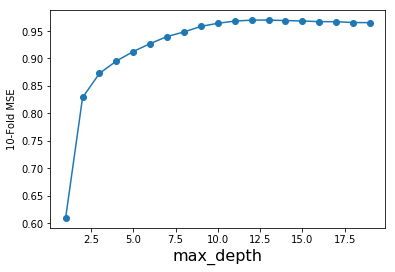

best mean cross-validation score: 0.972
best parameters: {'max_depth': 13}


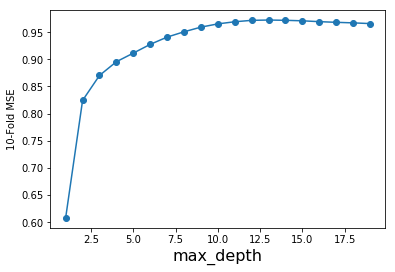

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
gr_dt01 = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
gr_dt01.fit(X_train01, y_train01)
print("best mean cross-validation score: {:.3f}".format(gr_dt01.best_score_))
print("best parameters: {}".format(gr_dt01.best_params_))

scores = np.array(gr_dt01.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

gr_dt02 = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
gr_dt02.fit(X_train02, y_train02)
print("best mean cross-validation score: {:.3f}".format(gr_dt02.best_score_))
print("best parameters: {}".format(gr_dt02.best_params_))

scores = np.array(gr_dt02.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [27]:
maxDepthOptimo = gr_dt01.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train01,y_train01)

print("Train: ",treeModel.score(X_train01,y_train01))
print("Test: ",treeModel.score(X_test01,y_test01))

maxDepthOptimo = gr_dt02.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train02,y_train02)

print("Train: ",treeModel.score(X_train02,y_train02))
print("Test: ",treeModel.score(X_test02,y_test02))

('Train: ', 0.98676986334718364)
('Test: ', 0.97290577604089934)
('Train: ', 0.98594045709333178)
('Test: ', 0.9737571496451739)


We can see ACC-score improvements from the simple linear regression to Decision tree regression. We can see that filtered data also performs better in this case.

## Random Forest

best mean cross-validation score: 0.978
best parameters: {'max_depth': 19}


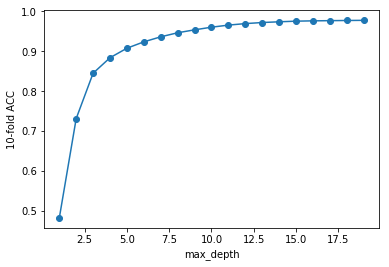

best mean cross-validation score: 0.966
best parameters: {'max_depth': 19}


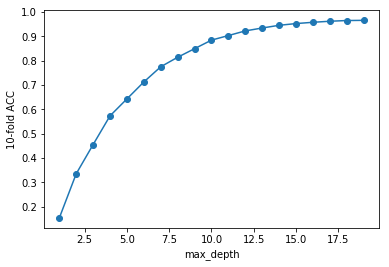

In [28]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

gr_rf01 = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
gr_rf01.fit(X_train01, y_train01)

print("best mean cross-validation score: {:.3f}".format(gr_rf01.best_score_))
print("best parameters: {}".format(gr_rf01.best_params_))

scores = np.array(gr_rf01.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

gr_rf02 = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
gr_rf02.fit(X_train02, y_train02)

print("best mean cross-validation score: {:.3f}".format(gr_rf02.best_score_))
print("best parameters: {}".format(gr_rf02.best_params_))

scores = np.array(gr_rf02.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [29]:
maxDepthOptimo = gr_rf01.best_params_['max_depth']
rf_01 = RandomForestRegressor(max_depth=10,n_estimators=100,max_features='sqrt')
rf_01.fit(X_train01,y_train01)

print("Train: ",rf_01.score(X_train01,y_train01))
print("Test: ",rf_01.score(X_test01,y_test01))

maxDepthOptimo = gr_rf02.best_params_['max_depth']
rf_02 = RandomForestRegressor(max_depth=10,n_estimators=100,max_features='sqrt')
rf_02.fit(X_train02,y_train02)

print("Train: ",rf_02.score(X_train02,y_train02))
print("Test: ",rf_02.score(X_test02,y_test02))

('Train: ', 0.96749433623382908)
('Test: ', 0.96241242499845781)
('Train: ', 0.89649232835415815)
('Test: ', 0.88706369849414568)


Random forest algorithm does not predict better the target than a simple decission tree model.

It is interesting that in this case filtered data has performed worse than complete data.

## Boosted Trees

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000, 2500,3000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train01, y_train01)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.978
best parameters: {'n_estimators': 2500, 'learning_rate': 0.1}


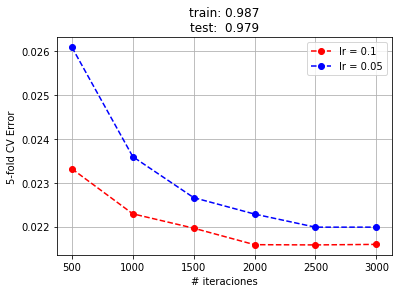

In [32]:
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 1500)
bt.fit(X_train01,y_train01)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train01,y_train01),bt.score(X_test01,y_test01)))
plt.grid()
plt.show()

Amazing ACC scores. This model seems to be the best one. (Taking into account the number of iterations we have done... No other result was expected)

Finally we can coclude that BoostedTrees is the winner!